<a href="https://colab.research.google.com/github/azcem/Image-classifer/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.feature import hog
import tensorflow as tf
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage.color import rgb2gray

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float64)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float64)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [37]:
#regularizer
dropout = tf.keras.layers.Dropout(0.7)

In [38]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    dropout,
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    dropout,
                                    tf.keras.layers.Dense(100, activation='softmax'),
]
)

In [10]:
model.summary()

ValueError: ignored

In [39]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [40]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 15s 9ms/step - loss: 4.0032 - accuracy: 0.0895 - val_loss: 3.4990 - val_accuracy: 0.1718
Epoch 2/100
1563/1563 [==============================] - 14s 9ms/step - loss: 3.4531 - accuracy: 0.1726 - val_loss: 3.0782 - val_accuracy: 0.2471
Epoch 3/100
1563/1563 [==============================] - 14s 9ms/step - loss: 3.1804 - accuracy: 0.2196 - val_loss: 2.8653 - val_accuracy: 0.2798
Epoch 4/100
1563/1563 [==============================] - 15s 9ms/step - loss: 3.0097 - accuracy: 0.2505 - val_loss: 2.7318 - val_accuracy: 0.3136
Epoch 5/100
1563/1563 [==============================] - 14s 9ms/step - loss: 2.8972 - accuracy: 0.2717 - val_loss: 2.6407 - val_accuracy: 0.3253
Epoch 6/100
1563/1563 [==============================] - 15s 9ms/step - loss: 2.8073 - accuracy: 0.2901 - val_loss: 2.5595 - val_accuracy: 0.3397
Epoch 7/100
1563/1563 [==============================] - 15s 9ms/step - loss: 2.7508 - accuracy: 0.2991 - val_loss: 2.5417 -

In [42]:
model.evaluate(x_train, y_train)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.5189 - accuracy: 0.5940


[1.5189121961593628, 0.5939599871635437]

In [43]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.1086 - accuracy: 0.4465


[2.108588457107544, 0.4465000033378601]

In [ ]:
model.save('cnn')

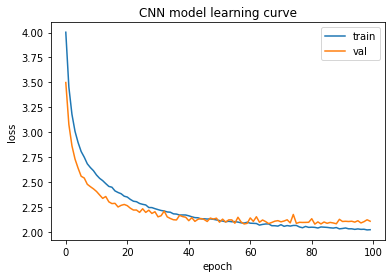

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model learning curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

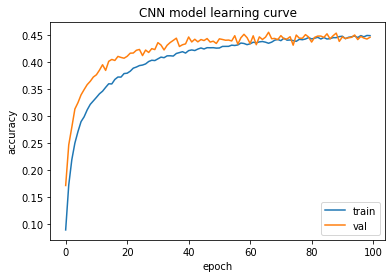

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model learning curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

In [ ]:
np.save('history.npy', history.history)
h = np.load('history.npy', allow_pickle=True).item()
plt.plot(h['loss'])
plt.plot(h['val_loss'])